In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# inspect to find column titles
inspector = inspect(engine)
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).all()
most_recent

[('2017-08-23',)]

[('2017-08-23',)]
2016-08-24


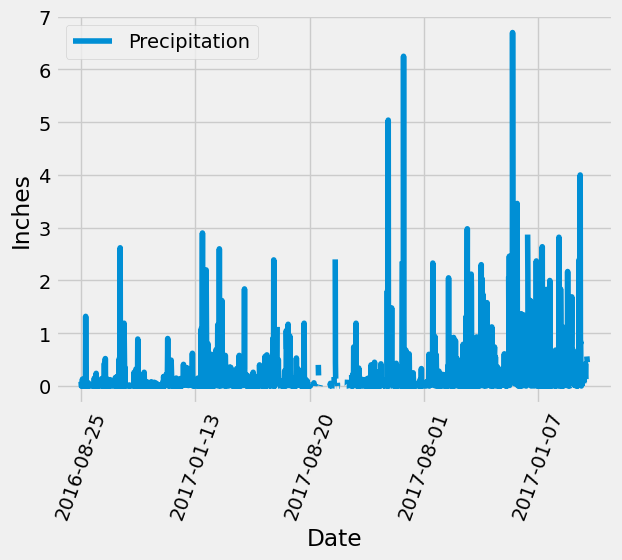

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(most_recent)
# Calculate the date one year from the last date in data set.
year_before = dt.date(2017,8,23) - dt.timedelta(weeks=52)
print(year_before)
# Perform a query to retrieve the data and precipitation scores
last12 = session.query(measurement.date, measurement.prcp).filter(measurement.date>year_before).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last12_df = pd.DataFrame(last12, columns=['Date','Precipitation'])
last12_df.set_index('Date', inplace=True)

# Sort the dataframe by date
last12_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
last12_df.plot()
plt.ylabel('Inches')
plt.xticks(rotation=70)
plt.show()

# Exploratory Station Analysis

In [70]:
# inspector to find column titles
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [102]:
# Design a query to calculate the total number of stations in the dataset
unique_stations = session.query(station.station).count()
unique_stations
# also could use func.count(station.station)

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [121]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
            filter(measurement.station == 'USC00519281').all()
active

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

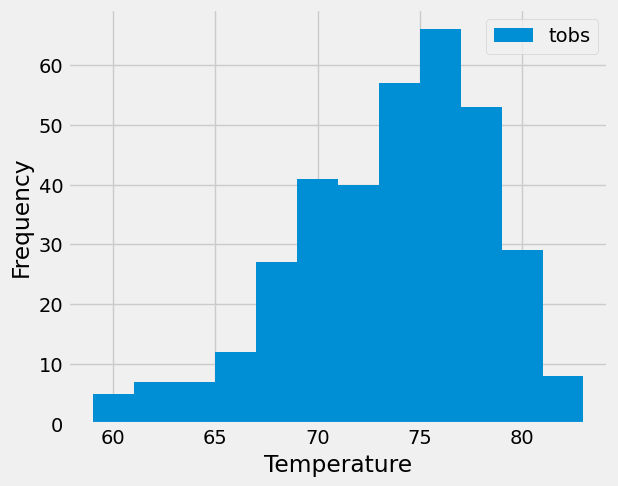

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_mostrecent = session.query(func.max(measurement.date)).filter(measurement.station == 'USC00519281').all()
station_yearbefore = dt.date(2017,8,18) - dt.timedelta(weeks=52)

# query and create dataframe
station_last12 = session.query(measurement.date,measurement.tobs).filter(measurement.date>=station_yearbefore).\
                    filter(measurement.station == 'USC00519281').all()
station_last12_df = pd.DataFrame(station_last12, columns=['station','tobs'])

# plot
plt.hist(station_last12_df['tobs'],12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs',loc='upper right')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()